In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import io
import matplotlib.pyplot as plt

# New Antecedent/Consequent objects hold universe variables and membership
# functions
humedad_suelo = ctrl.Antecedent(np.arange(0, 1024, 1), 'humedad_suelo')
tiempo_riego = ctrl.Consequent(np.arange(-2, 18, 1), 'tiempo_riego')

# Auto-membership function population is possible with .automf(3, 5, or 7)
humedad_suelo['seco'] = fuzz.trimf(humedad_suelo.universe, [0, 100, 200])
humedad_suelo['semi_seco'] = fuzz.trimf(humedad_suelo.universe, [120, 310, 500])
humedad_suelo['humedo'] = fuzz.trimf(humedad_suelo.universe, [450, 572, 694])
humedad_suelo['semi_humedo'] = fuzz.trimf(humedad_suelo.universe, [658, 725, 792])
humedad_suelo['encharcado'] = fuzz.trimf(humedad_suelo.universe, [750, 825, 900])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tiempo_riego['nada'] = fuzz.trimf(tiempo_riego.universe, [-2, -1, 0])
tiempo_riego['poco'] = fuzz.trimf(tiempo_riego.universe, [0, 2 , 4])
tiempo_riego['medio'] = fuzz.trimf(tiempo_riego.universe, [3, 6, 9])
tiempo_riego['bastante'] = fuzz.trimf(tiempo_riego.universe, [7, 9, 12])
tiempo_riego['mucho'] = fuzz.trapmf(tiempo_riego.universe, [10, 13, 17, 17])

C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


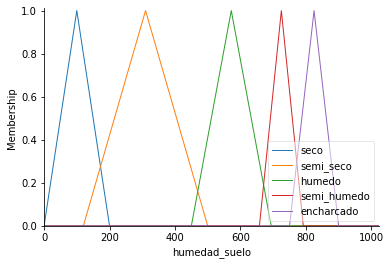

In [2]:
# You can see how these look with .view()
humedad_suelo.view()

C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


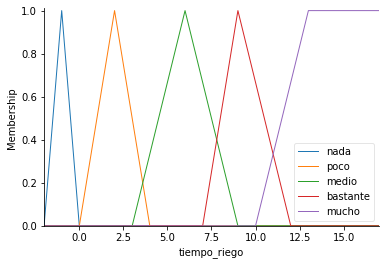

In [3]:
tiempo_riego.view()

IF humedad_suelo[encharcado] THEN tiempo_riego[nada]
	AND aggregation function : fmin
	OR aggregation function  : fmax


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

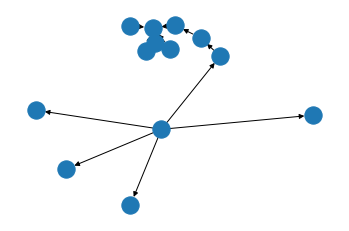

In [4]:
rule1 = ctrl.Rule(humedad_suelo['encharcado'], tiempo_riego['nada'])
rule2 = ctrl.Rule(humedad_suelo['semi_humedo'], tiempo_riego['poco'])
rule3 = ctrl.Rule(humedad_suelo['humedo'], tiempo_riego['medio'])
rule4 = ctrl.Rule(humedad_suelo['semi_seco'], tiempo_riego['bastante'])
rule5 = ctrl.Rule(humedad_suelo['seco'], tiempo_riego['mucho'])

print(rule1)

rule1.view()

## Control System Creation and Simulation.

Now that we have our rules defined, we can simply create a control system via:

In [5]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])

In order to simulate this control system, we will create a ControlSystemSimulation.
Think of this object representing our controller applied to a specific set of cirucmstances. 
For tipping, this might be tipping Sharon at the local brew-pub. 
We would create another ControlSystemSimulation when we’re trying to apply our tipping_ctrl for Travis at the cafe because the inputs would be different.

In [6]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

We can now simulate our control system by simply specifying the inputs and calling the compute method. Suppose we rated the quality 6.5 out of 10 and the service 9.8 of 10.

In [12]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['humedad_suelo'] = 150

# Crunch the numbers
tipping.compute()

Once computed, we can view the result as well as visualize it.

13.134792023190025


C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


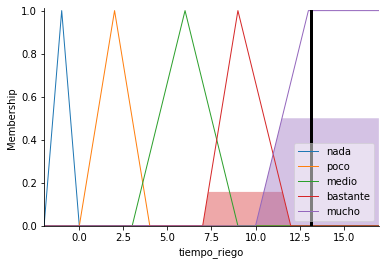

In [13]:
print (tipping.output['tiempo_riego'])
tiempo_riego.view(sim=tipping)



In [9]:
from gestion_riego.models import HistorialRiego

Fecha de Registro:  2020-12-10 12:00:20.130837
Humedad de Suelo:  127.29 Tiempo de Riego:  13.854937303701215
Fecha de Registro:  2020-12-10 08:00:20.194769
Humedad de Suelo:  278.93 Tiempo de Riego:  9.3409941988685
Fecha de Registro:  2020-12-09 17:00:20.292314
Humedad de Suelo:  531.96 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-09 12:00:20.452849
Humedad de Suelo:  526.84 Tiempo de Riego:  6.000000000000001


C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\dj

Fecha de Registro:  2020-12-09 08:00:20.096282
Humedad de Suelo:  536.94 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-08 17:00:19.988492
Humedad de Suelo:  535.19 Tiempo de Riego:  6.0
Fecha de Registro:  2020-12-08 12:00:20.334997
Humedad de Suelo:  534.02 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-08 08:00:19.820468
Humedad de Suelo:  542.40 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-07 17:00:19.866059
Humedad de Suelo:  542.16 Tiempo de Riego:  6.0
Fecha de Registro:  2020-12-07 13:35:20.024538
Humedad de Suelo:  542.13 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-07 08:00:20.109150
Humedad de Suelo:  517.58 Tiempo de Riego:  6.0
Fecha de Registro:  2020-12-06 17:00:02.901579
Humedad de Suelo:  493.84 Tiempo de Riego:  6.250722574808434
Fecha de Registro:  2020-12-06 17:00:02.722864
Humedad de Suelo:  493.84 Tiempo de Riego:  6.250722574808434


C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\dj

Fecha de Registro:  2020-12-06 17:00:02.694938
Humedad de Suelo:  493.84 Tiempo de Riego:  6.250722574808434
Fecha de Registro:  2020-12-06 15:48:20.752262
Humedad de Suelo:  455.22 Tiempo de Riego:  8.814814984492834
Fecha de Registro:  2020-12-06 15:48:20.567617
Humedad de Suelo:  455.22 Tiempo de Riego:  8.814814984492834
Fecha de Registro:  2020-12-06 15:48:20.563655
Humedad de Suelo:  455.22 Tiempo de Riego:  8.814814984492834
Fecha de Registro:  2020-12-06 12:36:42.594782
Humedad de Suelo:  540.19 Tiempo de Riego:  6.000000000000001


C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


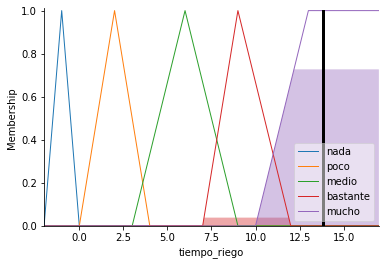

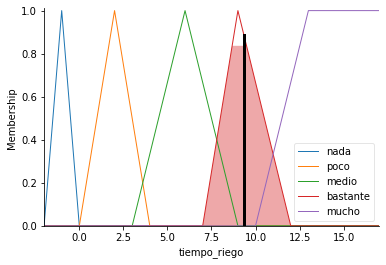

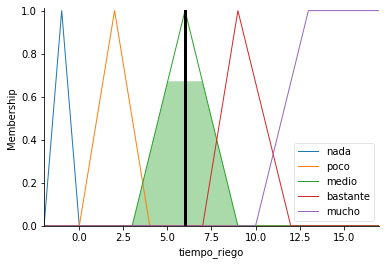

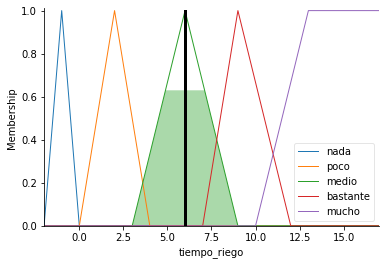

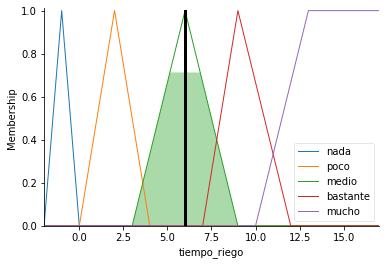

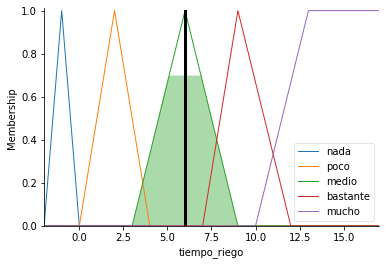

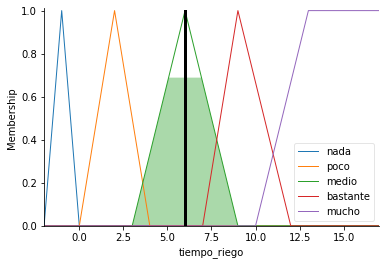

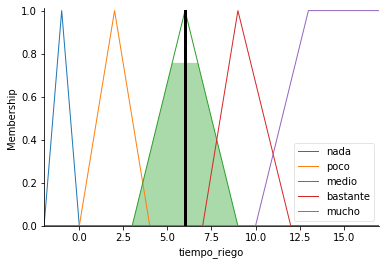

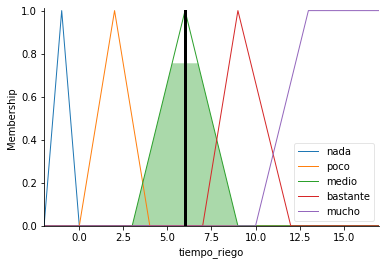

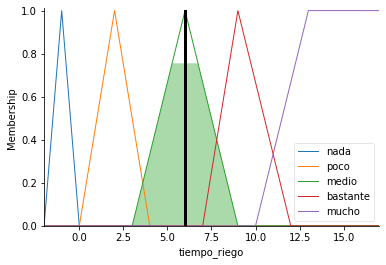

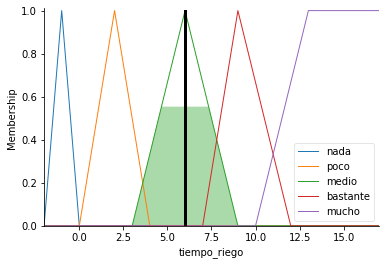

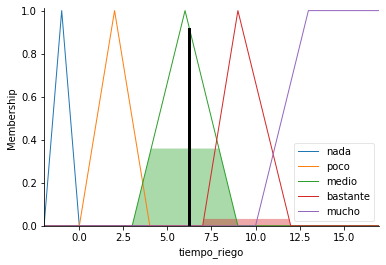

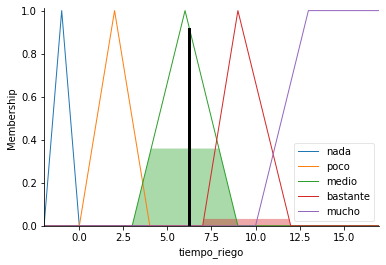

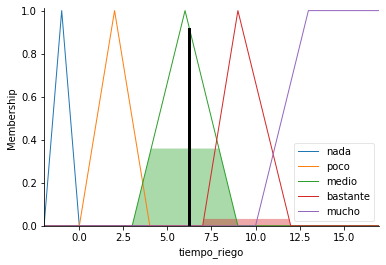

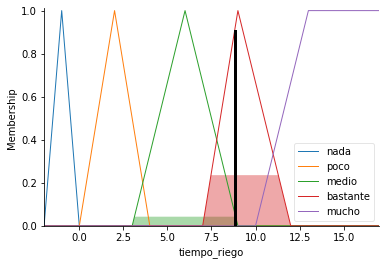

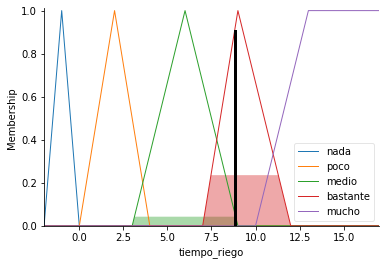

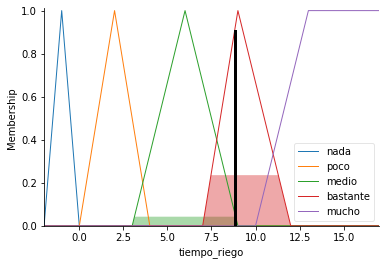

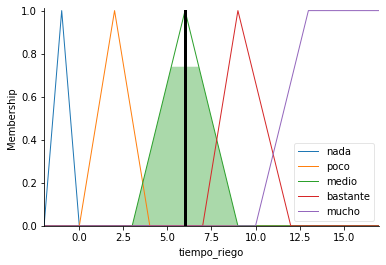

In [14]:
historial = HistorialRiego.objects.filter(codigo_sensor = 5)
for h in historial:
    
    try:
        tipping.input['humedad_suelo'] = float(h.valor_humed_suelo)
        tipping.compute()
        print("Fecha de Registro: ", h.fecha_riego)
        print("Humedad de Suelo: ",h.valor_humed_suelo, "Tiempo de Riego: ", tipping.output['tiempo_riego'])
        tiempo_riego.view(sim=tipping)
        
    except:
        pass
    